# Importing important libraries

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from collections import Counter
from sklearn.metrics import silhouette_score, silhouette_samples
import spacy
import scipy
import re
from sklearn.cluster import KMeans
import string
from gensim.parsing.preprocessing import preprocess_string

In [199]:
!pip install spacytextblob

In [200]:
four_wheeler = pd.read_csv('/content/drive/MyDrive/ev-cars-reveiw-india/4-wheeler-EV-cardekho.csv')
four_wheeler_carwale = pd.read_csv('/content/drive/MyDrive/ev-cars-reveiw-india/4-wheeler-EV-carwale.csv')

In [201]:
four_wheeler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Review                140 non-null    object 
 1   Rating                140 non-null    float64
 2   Attributes Mentioned  140 non-null    object 
 3   Model                 140 non-null    object 
dtypes: float64(1), object(3)
memory usage: 4.5+ KB


In [202]:
four_wheeler_carwale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review           129 non-null    object 
 1   Exterior         129 non-null    float64
 2   Comfort          129 non-null    float64
 3   Performance      129 non-null    float64
 4   Fuel Economy     129 non-null    float64
 5   Value for Money  129 non-null    float64
 6   Condition        129 non-null    object 
 7   driven           129 non-null    object 
 8   rating           129 non-null    float64
 9   model_name       129 non-null    object 
dtypes: float64(6), object(4)
memory usage: 10.2+ KB


#Data preprocessing

In [203]:
# Preprocess text data (Review column)
vectorizer = TfidfVectorizer(
    lowercase=True,
    stop_words='english'
)
tfidf_matrix = vectorizer.fit_transform(four_wheeler['Review'])

In [204]:
# Preprocess categorical data (Model column)
encoded_categorical_values = pd.get_dummies(four_wheeler['Model'], drop_first=True)

In [205]:
# Preprocess 'Attributes Mentioned' column
mlb = MultiLabelBinarizer()
attributes_matrix = mlb.fit_transform(four_wheeler['Attributes Mentioned'])

In [206]:
# Combine preprocessed data into a feature matrix
feature_matrix = pd.concat([pd.DataFrame(tfidf_matrix.toarray()),
                            encoded_categorical_values,
                            pd.DataFrame(attributes_matrix),
                            four_wheeler['Rating']], axis=1)

feature_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,Rating
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,1,1,1,1,0,0,5.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,1,0,1,0,0,0,1.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,0,0,1,0,0,0,5.0
3,0.0,0.0,0.0,0.271028,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,5.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,1,1,1,0,1,0,4.0


In [207]:
feature_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Columns: 968 entries, 0 to Rating
dtypes: float64(934), int64(29), uint8(5)
memory usage: 1.0 MB


# Four wheeler customer segmentation

In [208]:
# Convert column names to string data types
feature_matrix.columns = feature_matrix.columns.astype(str)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

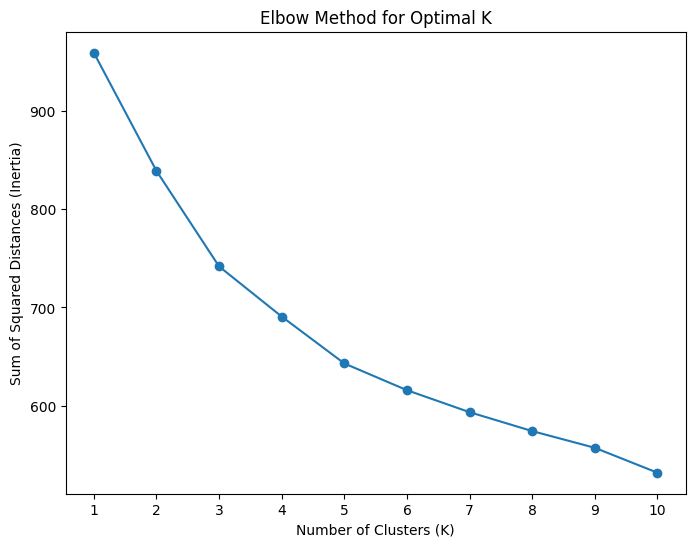

In [209]:

# Select the range of k values to consider
k_values = range(1, 11)  # You can adjust the range as needed

# Calculate the sum of squared distances (inertia) for each k value
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(feature_matrix)  # Use your preprocessed feature matrix here
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.xticks(k_values)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

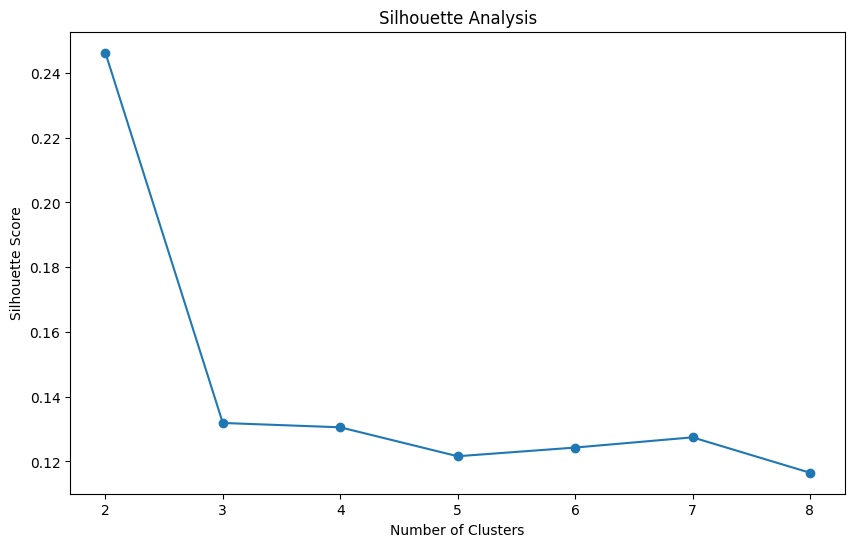

In [210]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

silhouette_scores = []
for n_clusters in range_n_clusters:
    # Initialize the KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(feature_matrix)

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(feature_matrix, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Create the silhouette analysis plot
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.xticks(range_n_clusters)
plt.show()

Applying K-means clustering to segment into two groups.

In [211]:
num_clusters = 2
kmeans = KMeans(n_clusters = num_clusters, random_state = 42)
kmeans.fit(feature_matrix)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [212]:
len(kmeans.labels_)

140

In [213]:
#Calculating silhouttes score
labels = kmeans.labels_
silhouette_avg = silhouette_score(feature_matrix, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.24623175546479864


In [214]:
#Adding the cluster labels in the dataframe
four_wheeler['Cluster'] = kmeans.labels_

In [215]:
four_wheeler.head()

,Review,Rating,Attributes Mentioned,Model,Cluster
0,Using it for the last 1 month. It's a gentle-l...,5.0,['mileage' 'performance' 'power' 'price' 'seat...,hyundai kona,0
1,"In the beginning, the car performed excellentl...",1.0,['mileage' 'performance' 'service' 'parts'],hyundai kona,1
2,Hyundai is the best performing company beating...,5.0,['performance' 'service'],hyundai kona,0
3,The car offers reasonable performance in this ...,5.0,['performance'],hyundai kona,0
4,Hyundai Kona - First electric car of India was...,4.0,['looks' 'comfort' 'interior' 'price' 'insuran...,hyundai kona,0


Text(0.5, 0, 'Cluster')

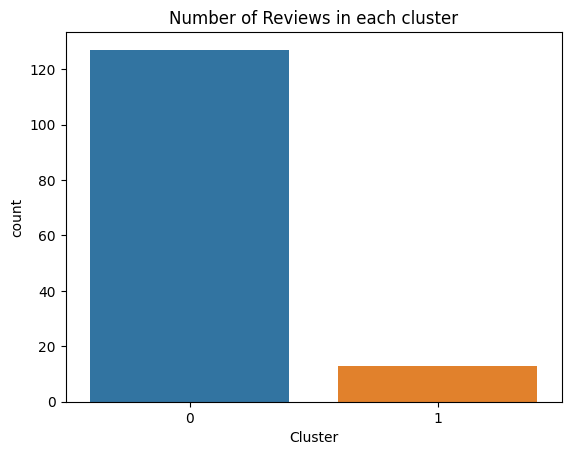

In [216]:
sns.countplot(data = four_wheeler, x = 'Cluster')
plt.title('Number of Reviews in each cluster')
plt.xlabel('Cluster')

# Analysing each cluster

Text(0.5, 1.0, 'Cluster V/S Model')

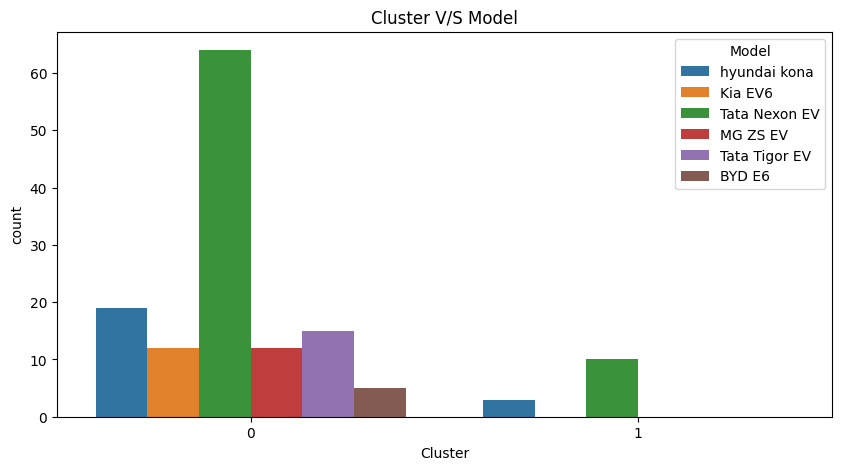

In [217]:
plt.figure(figsize = (10,5))
sns.countplot(data = four_wheeler, x = 'Cluster', hue = 'Model')
plt.title('Cluster V/S Model')

Conclusion : Tata Nexon EV is the most preferred EV in all the three clusters.

Text(0.5, 1.0, 'Average Ratings by Cluster')

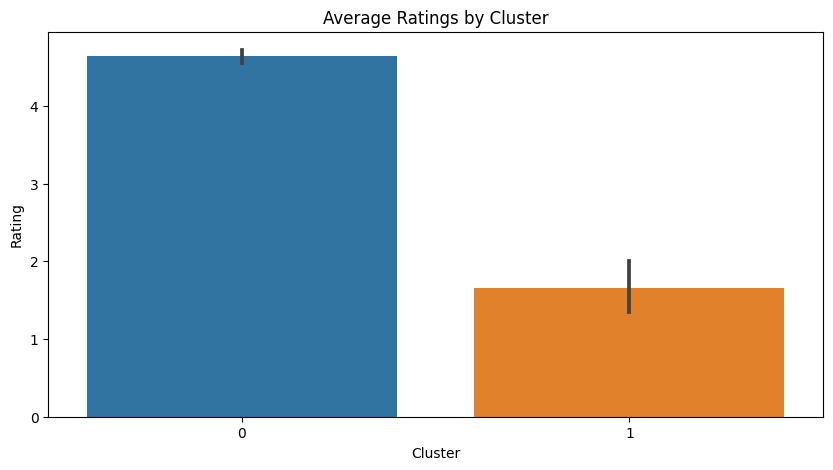

In [218]:
plt.figure(figsize = (10,5))
sns.barplot(data = four_wheeler, x = 'Cluster', y = 'Rating')
plt.title('Average Ratings by Cluster')

Conclusion : The average ratings given by the people lies in cluster 0 has given lowest rating to the overall electric vehicles, this may be the target cluster of customers to which we can focus on through getting the feedback about the electric vehicles. The other two clusters are those to which the company get the maximum profit.

Frequent Attributes mentioned by the people from cluster 0

In [219]:
cluster_0_data = four_wheeler[four_wheeler['Cluster'] == 0]
cluster_0_data.head()

,Review,Rating,Attributes Mentioned,Model,Cluster
0,Using it for the last 1 month. It's a gentle-l...,5.0,['mileage' 'performance' 'power' 'price' 'seat...,hyundai kona,0
2,Hyundai is the best performing company beating...,5.0,['performance' 'service'],hyundai kona,0
3,The car offers reasonable performance in this ...,5.0,['performance'],hyundai kona,0
4,Hyundai Kona - First electric car of India was...,4.0,['looks' 'comfort' 'interior' 'price' 'insuran...,hyundai kona,0
5,Hyundai Kona is the 1st SUV to run in India wi...,4.0,['looks' 'power' 'price' 'service' 'parts' 'ca...,hyundai kona,0


In [220]:
#extract most frquent attribute mentioned by the cluster 0 people
word_freq = Counter()

for cell in cluster_0_data['Attributes Mentioned']:
  words = re.findall(r"'(.*?)'", cell)
  word_freq.update(words)

In [221]:
# Find the most frequent attribute mentioned by cluster 0 people
most_common_word, frequency = word_freq.most_common(1)[0]

print("Most Common Word:", most_common_word)
print("Frequency:", frequency)

Most Common Word: looks
Frequency: 36


In [222]:
word_freq.most_common


<bound method Counter.most_common of Counter({'looks': 36, 'comfort': 34, 'price': 29, 'performance': 27, 'mileage': 19, 'interior': 17, 'safety': 15, 'experience': 13, 'maintenance': 13, 'power': 12, 'seat': 10, 'speed': 9, 'exterior': 7, 'ac': 7, 'space': 7, 'pickup': 5, 'driver': 4, 'service': 4, 'parts': 4, 'headlamp': 4, 'torque': 4, 'lights': 4, 'engine': 4, 'style': 4, 'sunroof': 4, 'music': 3, 'insurance': 3, 'automatic': 3, 'warranty': 3, 'rear': 3, 'infotainment': 3, 'clearance': 3, 'steering': 3, 'cabin': 2, 'noise': 2, 'airbags': 2, 'audio': 1, 'bluetooth': 1, 'manual': 1, 'transmission': 1, 'gear': 1, 'led': 1, 'sell': 1, 'entertainment': 1, 'small': 1, 'alloy': 1, 'wheel': 1, 'sensors': 1, 'vent': 1, 'legroom': 1, 'dealer': 1, 'parking': 1, 'comparison': 1, 'boot': 1, 'color': 1, 'luggage': 1})>

Conclusion: So, the group of people from cluster 0 who gave the lowest averae ratings mentioned 'price', 'mileage' and 'service' as the most frequent attributes, so we need to focus on these features of the EV to work upon them and improve them.

# Positive attributes from cluster 1 and cluster 2

In [223]:
cluster_1_data = four_wheeler[four_wheeler['Cluster'] == 1]
cluster_2_data = four_wheeler[four_wheeler['Cluster'] == 2]

In [224]:
cluster_1_data.head(
)

,Review,Rating,Attributes Mentioned,Model,Cluster
1,"In the beginning, the car performed excellentl...",1.0,['mileage' 'performance' 'service' 'parts'],hyundai kona,1
15,The car is high priced when compared with othe...,1.0,['price'],hyundai kona,1
18,"Not worth the money, the price needs to come d...",1.0,['price'],hyundai kona,1
42,"I recently bought this vehicle, but not happy ...",2.5,['mileage'],Tata Nexon EV,1
80,Driving the car for more than a month now. Pro...,2.5,['interior' 'maintenance' 'ac' 'noise' 'steeri...,Tata Nexon EV,1


In [225]:
cluster_2_data.head(
)

,Review,Rating,Attributes Mentioned,Model,Cluster


In [226]:
#extract most frquent attribute mentioned by the cluster 1 people
word_freq_c1 = Counter()

for cell in cluster_1_data['Attributes Mentioned']:
  words = re.findall(r"'(.*?)'", cell)
  word_freq_c1.update(words)

In [227]:
word_freq_c1

Counter({'mileage': 2,
         'performance': 1,
         'service': 4,
         'parts': 1,
         'price': 3,
         'interior': 1,
         'maintenance': 1,
         'ac': 2,
         'noise': 1,
         'steering': 1,
         'safety': 1,
         'dealer': 2,
         'experience': 2,
         'gear': 1,
         'showroom': 1})

Conclusion: The average rating given by the people of cluster 1 is above 4.5 and the most frequent attributes present the reviews given by them include:
comfort, performance and looks.

In [228]:
#extract most frquent attribute mentioned by the cluster 2 people
word_freq_c2 = Counter()

for cell in cluster_2_data['Attributes Mentioned']:
  words = re.findall(r"'(.*?)'", cell)
  word_freq_c2.update(words)

In [229]:
word_freq_c2

Counter()

Conclusion: The most frequent attributes mentioned by the people of cluster 2 include: Price and looks.

# Four Wheeler Data from Carwale

In [230]:
four_wheeler_carwale.head()

,review,Exterior,Comfort,Performance,Fuel Economy,Value for Money,Condition,driven,rating,model_name
0,Superb car like as fantastic as petroleum car....,5.0,4.0,5.0,5.0,5.0,New,Few hundred kilometers,5.0,hyundai kona
1,"Anti national, worst service, worst customer c...",1.0,1.0,1.0,1.0,1.0,New,Haven't driven it,0.0,hyundai kona
2,Super happy with it. The car is too good,4.0,5.0,5.0,5.0,4.0,New,Few thousand kilometers,5.0,hyundai kona
3,"Pretty good car, smooth as a glider fast car, ...",5.0,5.0,5.0,5.0,5.0,New,Few thousand kilometers,5.0,hyundai kona
4,Price difference between petrol and electronic...,4.0,4.0,5.0,3.0,2.0,Not Purchased,Haven't driven it,3.0,hyundai kona


In [231]:
four_wheeler_carwale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review           129 non-null    object 
 1   Exterior         129 non-null    float64
 2   Comfort          129 non-null    float64
 3   Performance      129 non-null    float64
 4   Fuel Economy     129 non-null    float64
 5   Value for Money  129 non-null    float64
 6   Condition        129 non-null    object 
 7   driven           129 non-null    object 
 8   rating           129 non-null    float64
 9   model_name       129 non-null    object 
dtypes: float64(6), object(4)
memory usage: 10.2+ KB


In [232]:
four_wheeler_carwale.describe()

,Exterior,Comfort,Performance,Fuel Economy,Value for Money,rating
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,4.472868,4.418605,4.418605,4.418605,4.162791,4.341085
std,0.968871,1.036051,1.150392,1.122899,1.345076,1.389110
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
50%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Segmentation using k-means clustering

Data preprocessing

In [233]:
# Preprocess text data (Review column)
vectorizer = TfidfVectorizer(
    lowercase=True,
    stop_words='english'
)
tfidf_matrix_carwale = vectorizer.fit_transform(four_wheeler_carwale['review'])



In [234]:
# Preprocess categorical data (model_name column)
encoded_categorical_values_carwale = pd.get_dummies(four_wheeler_carwale['model_name'], drop_first=True)

In [235]:
# Preprocess 'driven' column
mlb = MultiLabelBinarizer()
driven_matrix_carwale = mlb.fit_transform(four_wheeler_carwale['driven'])

In [236]:
#preprocess the 'condition' column
condition_dummy = pd.get_dummies(four_wheeler_carwale['driven'], drop_first = True)

In [237]:
# Combine preprocessed data into a feature matrix
feature_matrix_carwale = pd.concat([pd.DataFrame(tfidf_matrix_carwale.toarray()),
                            encoded_categorical_values_carwale,
                            pd.DataFrame(driven_matrix_carwale),
                            four_wheeler_carwale['Exterior'],
                            four_wheeler_carwale['Comfort'],
                            four_wheeler_carwale['Performance'],
                            four_wheeler_carwale['Fuel Economy'],
                            four_wheeler_carwale['Value for Money'],
                            four_wheeler_carwale['rating']], axis=1)

feature_matrix_carwale.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,Exterior,Comfort,Performance,Fuel Economy,Value for Money,rating
0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,5.0,4.0,5.0,5.0,5.0,5.0
1,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,1.0,1.0,1.0,1.0,1.0,0.0
2,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,4.0,5.0,5.0,5.0,4.0,5.0
3,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,5.0,5.0,5.0,5.0,5.0,5.0
4,0.0,0.16297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,4.0,4.0,5.0,3.0,2.0,3.0


Deciding the number of clusters using elbow method and segmentation using K-means clustering

In [238]:
# Convert column names to string data types
feature_matrix_carwale.columns = feature_matrix_carwale.columns.astype(str)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

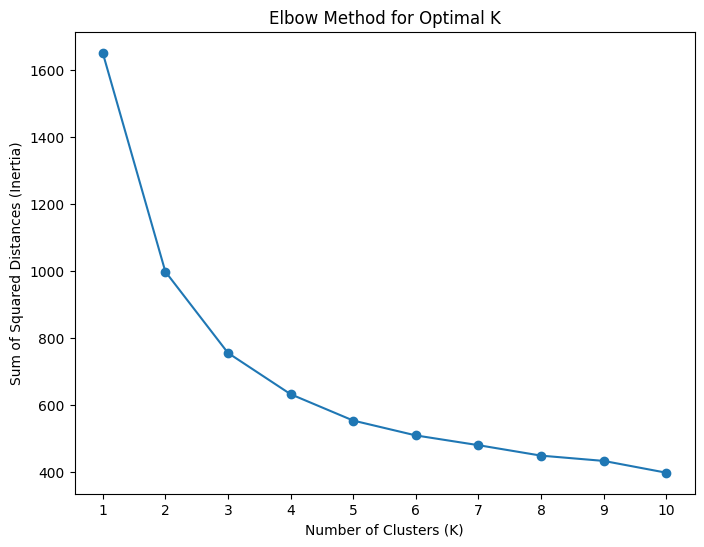

In [239]:
# Select the range of k values to consider
k_values = range(1, 11)  # You can adjust the range as needed

# Calculate the sum of squared distances (inertia) for each k value
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(feature_matrix_carwale)  # Use your preprocessed feature matrix here
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.xticks(k_values)
plt.show()


In [240]:
# we will take the cluster value as 4
num_clusters = 2
kmeans_carwale = KMeans(n_clusters = num_clusters, random_state = 42)
kmeans_carwale.fit(feature_matrix_carwale)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [241]:
silhouette_avg = silhouette_score(feature_matrix_carwale, kmeans_carwale.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.4962614789009928


In [242]:
#Adding the cluster labels in the dataframe
four_wheeler_carwale['Cluster'] = kmeans_carwale.labels_

In [243]:
four_wheeler_carwale.head()

,review,Exterior,Comfort,Performance,Fuel Economy,Value for Money,Condition,driven,rating,model_name,Cluster
0,Superb car like as fantastic as petroleum car....,5.0,4.0,5.0,5.0,5.0,New,Few hundred kilometers,5.0,hyundai kona,0
1,"Anti national, worst service, worst customer c...",1.0,1.0,1.0,1.0,1.0,New,Haven't driven it,0.0,hyundai kona,1
2,Super happy with it. The car is too good,4.0,5.0,5.0,5.0,4.0,New,Few thousand kilometers,5.0,hyundai kona,0
3,"Pretty good car, smooth as a glider fast car, ...",5.0,5.0,5.0,5.0,5.0,New,Few thousand kilometers,5.0,hyundai kona,0
4,Price difference between petrol and electronic...,4.0,4.0,5.0,3.0,2.0,Not Purchased,Haven't driven it,3.0,hyundai kona,1


Text(0.5, 0, 'cluster')

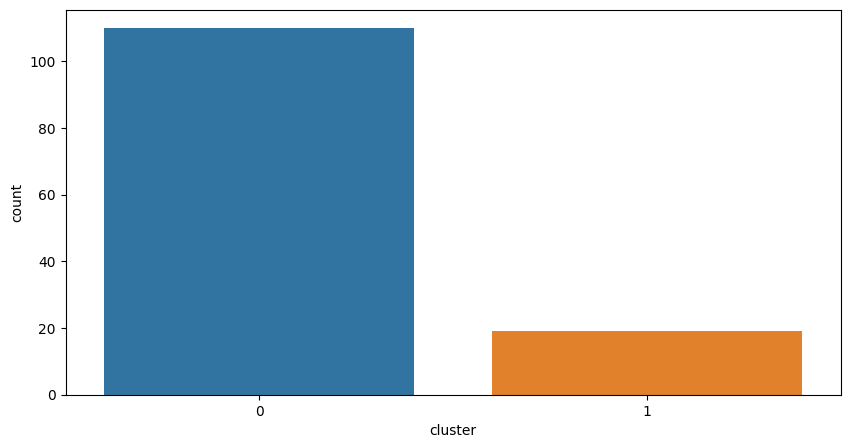

In [244]:
plt.figure(figsize = (10,5))
sns.countplot(data = four_wheeler_carwale, x = 'Cluster')
plt.xlabel('cluster')

# Analysing each cluster to extract features from each cluster

Text(0.5, 1.0, 'Average ratings by clusters')

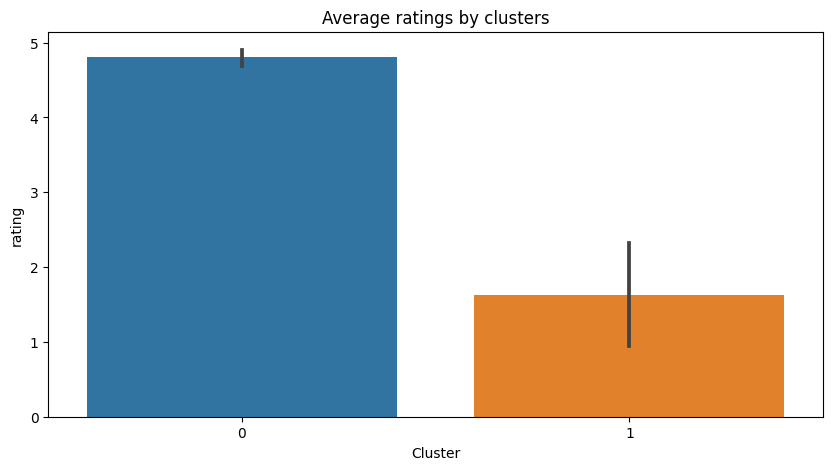

In [245]:
#average mratings by cluster
plt.figure(figsize = (10,5))
sns.barplot(data = four_wheeler_carwale,x = 'Cluster',y='rating')
plt.title('Average ratings by clusters')

Conclusion: Cluster 1 and Cluster 3 people give less average rating, need to analyse these clustrs in order to understand the key points of improvements.

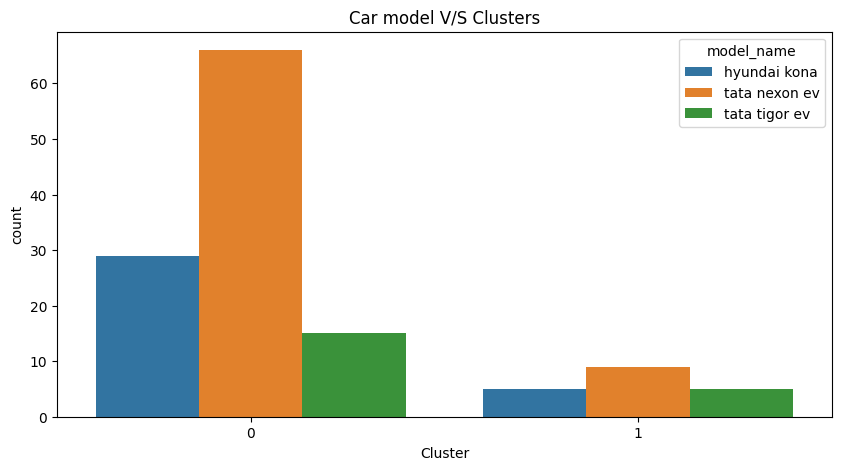

In [246]:
# Car model by clusters
plt.figure(figsize = (10,5))
sns.countplot(data = four_wheeler_carwale, x = 'Cluster',hue = 'model_name')
plt.title('Car model V/S Clusters')
plt.show()

Conclusion: The most preferred EV among all the clusters is TATA Nexon EV, in cluster 1 it is second most favoured and least favoured is TATA Tigor EV.

In [247]:
#filter the data and remove those who have'nt rate
filtered_data = four_wheeler_carwale[four_wheeler_carwale['rating'] != 0.0]

In [248]:
#group each cluster data to analyse them separately
cluster_0_carwale = filtered_data[filtered_data['Cluster'] == 0]
cluster_1_carwale = filtered_data[filtered_data['Cluster'] == 1]
cluster_2_carwale = filtered_data[filtered_data['Cluster'] == 2]
cluster_3_carwale = filtered_data[filtered_data['Cluster'] == 3]

In [249]:
cluster_0_carwale.head()

,review,Exterior,Comfort,Performance,Fuel Economy,Value for Money,Condition,driven,rating,model_name,Cluster
0,Superb car like as fantastic as petroleum car....,5.0,4.0,5.0,5.0,5.0,New,Few hundred kilometers,5.0,hyundai kona,0
2,Super happy with it. The car is too good,4.0,5.0,5.0,5.0,4.0,New,Few thousand kilometers,5.0,hyundai kona,0
3,"Pretty good car, smooth as a glider fast car, ...",5.0,5.0,5.0,5.0,5.0,New,Few thousand kilometers,5.0,hyundai kona,0
5,"Except for the short legroom in the rear, this...",5.0,3.0,5.0,5.0,4.0,New,Few thousand kilometers,5.0,hyundai kona,0
6,Good experience good driving experience all pe...,5.0,5.0,5.0,5.0,5.0,New,Did a short drive once,5.0,hyundai kona,0


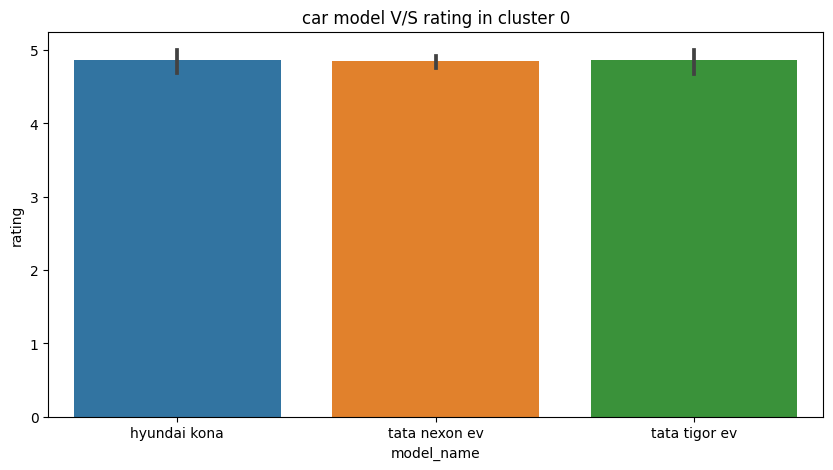

In [250]:
# Average rating to each car model in cluster 0
plt.figure(figsize = (10,5))
sns.barplot(data = cluster_0_carwale, x = 'model_name',y = 'rating')
plt.title('car model V/S rating in cluster 0')
plt.show()

Conclusion: In the cluster 0 there are no people who bought tata tigor still rated so they are not consider in the analysis.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Exterior'),
  Text(1, 0, 'Comfort'),
  Text(2, 0, 'Performance'),
  Text(3, 0, 'Fuel Economy'),
  Text(4, 0, 'Value for Money')])

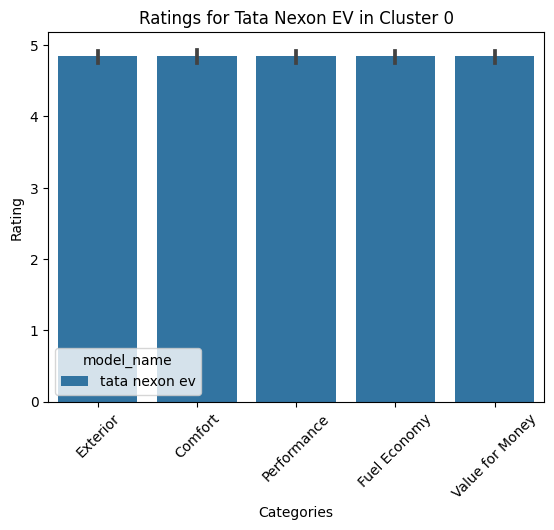

In [251]:
import seaborn as sns
import matplotlib.pyplot as plt

tata_nexon_in_0 = cluster_0_carwale[cluster_0_carwale['model_name'] == 'tata nexon ev']

# Specify the columns for the x-axis
x_columns = ['Exterior', 'Comfort', 'Performance', 'Fuel Economy', 'Value for Money']

# Melt the DataFrame to convert it to a long format
melted_df = tata_nexon_in_0.melt(id_vars=['model_name', 'rating'], value_vars=x_columns, var_name='Category')

# Create the bar plot using Seaborn
sns.barplot(data=melted_df, x='Category', y='rating', hue='model_name')

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Rating')
plt.title('Ratings for Tata Nexon EV in Cluster 0')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

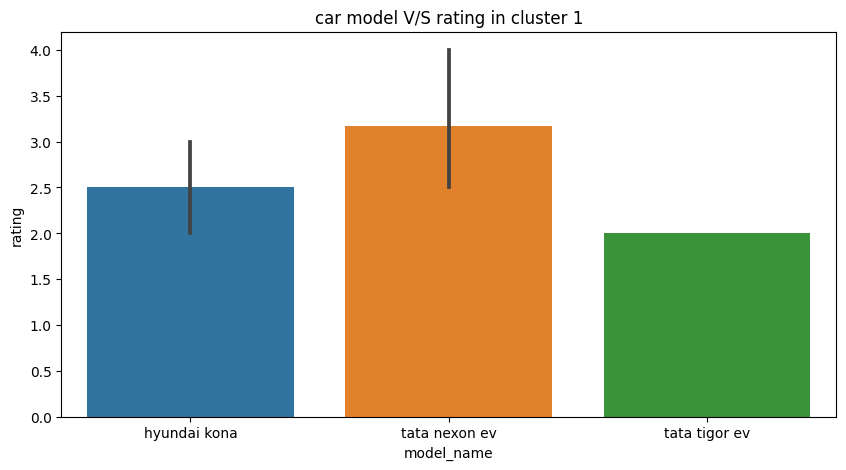

In [252]:
# Average rating to each car model in cluster 1
plt.figure(figsize = (10,5))
sns.barplot(data = cluster_1_carwale, x = 'model_name',y = 'rating')
plt.title('car model V/S rating in cluster 1')
plt.show()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Exterior'),
  Text(1, 0, 'Comfort'),
  Text(2, 0, 'Performance'),
  Text(3, 0, 'Fuel Economy'),
  Text(4, 0, 'Value for Money')])

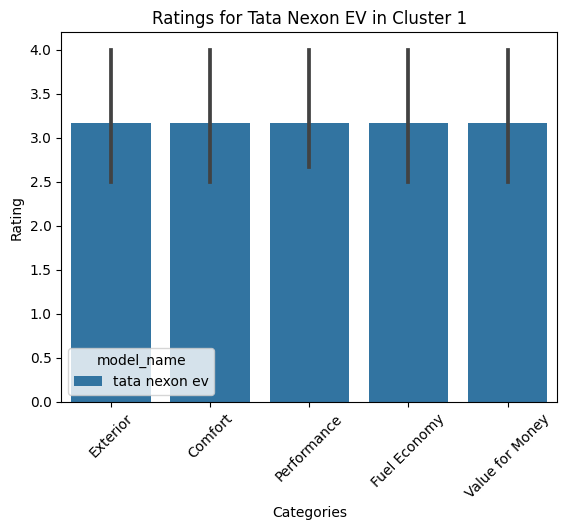

In [253]:
tata_nexon_in_1 = cluster_1_carwale[cluster_1_carwale['model_name'] == 'tata nexon ev']
# Specify the columns for the x-axis
x_columns_1 = ['Exterior', 'Comfort', 'Performance', 'Fuel Economy', 'Value for Money']

# Melt the DataFrame to convert it to a long format
melted_df_1 = tata_nexon_in_1.melt(id_vars=['model_name', 'rating'], value_vars=x_columns, var_name='Category')

# Create the bar plot using Seaborn
sns.barplot(data=melted_df_1, x='Category', y='rating', hue='model_name')

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Rating')
plt.title('Ratings for Tata Nexon EV in Cluster 1')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)